# Fatal Police Shootings in the US (2015-2020)

Police brutality has been a problem in the United States since police forces have existed. However, in recent years this problem has come to the attention of the average US resident, thanks to more accessible, better media coverage. Sadly, there have been too many fatal encounters with the police, especially through gun violence. 

What disturbs the public even more is the alarming disproportion between the number of cases in which racial and ethnic minorites fall victim to police brutality compared to those that are white. Many have argued that there is not a problem because the chances of being fatally shot by police are low and because looking at numbers, there are more incidents of white people being fatally shot by police than people of other races. Additionally, some say that there are more minorities getting involved with the police, attacking police, etc. than white people.

The purpose of this project is to explore cases of fatal police shootings in the US from 2015-2020 and find out through data analysis if there is indeed a disproportion between fatal police shootings among white people and minorities. If there is, where in the US is this issue most prevalent? Additionally, can we find evidence to counter the types of claims posed above? 



## Summary of Results

We found that minorities in the US are disproportionately shot and killed by the police. Black people tend to be shot and killed by police more than any other race. Additionally, we saw that the states Utah, Minnesota, West Virginia, and Massachusetts have the greatest disproportions for Black, Native American, Asian, and Hispanic people, respectively. 

Additionally, 65% of people attacked police before being shot. The proportion of white people that attacked was higher than the proportion for all other races excpet black, which was only greater by about 1%.  

***

## The Data

The Washington Post has been recording fatal police shootings throughout the United States since 2015 and continues to compile this information into a dataset which can be found in their GitHub repository [here.](https://github.com/washingtonpost/data-police-shootings)

The data includes
   - __name__: The name of the vicitim 
   - __date__: The month, day and year of the fatal shooting
   - __manner_of_death__: How the person was killed
   - __armed__: Whether or not the person was armed, and if so the weapon is specified
   - __age__: The age of the victim 
   - __gender__: The gender of the victim (Male, Female, or unknown)
   - __race:__ The victim's race (W-White, B-Black, H-Hispanic, A-Asian, N-Native American, O-Other)
   - __city:__ The city in which the shooting took place
   - __state:__ The state in which the shooting took place (by abbreviaiton)
   - __signs_of_mental_illness:__ True or False
   - __threat_level:__ Whether or not the victim attacked the police
   - __flee:__ Whether or not the victim fled, and how (by vehicle, on foot, etc)
   - __body_camera:__ Whether or not the police officer(s) had a body camera on them at the time of the incident

### Census Data
In addition, four datasets from the US census will be used. These include the estimated racial population in each state. The datasets can be found [here.](https://data.census.gov/cedsci/table?q=United%20States&table=DP05&tid=ACSDT1Y2018.B03002&g=0100000US,.04000.001&lastDisplayedRow=29&vintage=2018&layer=state&cid=DP05_0001E&t=Race%20and%20Ethnicity&hidePreview=true&moe=false&tp=false) These will be combined and averaged to get a better estimate of the population of each race in each state since 2015. 



***

## Exploring the Data

We will start by loading the data from the Washington Post.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
%matplotlib inline
from IPython.display import display, HTML


In [2]:
# Read in data from the Washington Post's GitHub repository
url = "https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv"
content = requests.get(url)
wrapper = csv.reader(content.text.strip().split('\n'),delimiter=",")
unwrap = list()
for row in wrapper:
    unwrap.append(row)

In [3]:
# Store content into a Data Frame named shootings
column_names = unwrap[0]
data = pd.DataFrame(unwrap[1:],columns=column_names)
shootings = data.copy()




In [83]:
# Display information about the dataset, i.e. datatypes, missing values, etc
shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 5608
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       4997 non-null   object
 1   name                     4997 non-null   object
 2   date                     4997 non-null   object
 3   manner_of_death          4997 non-null   object
 4   armed                    4997 non-null   object
 5   age                      4997 non-null   object
 6   gender                   4997 non-null   object
 7   race                     4997 non-null   object
 8   city                     4997 non-null   object
 9   state                    4997 non-null   object
 10  signs_of_mental_illness  4997 non-null   object
 11  threat_level             4997 non-null   object
 12  flee                     4997 non-null   object
 13  body_camera              4997 non-null   object
 14  longitude                4997 non-null  

In [4]:
# Display the first few rows of data
shootings.head(5)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


***

## Exploring the Number of Shootings per Year in the US

Here we will look at the statistics for fatal police shootings throughout the United States from 2015 - 2020.


In [79]:
# Just some formatting in Jupyter
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [6]:
# Extract only the year from the date and add to a new column in the df
shootings['year'] = shootings['date'].str.extract(r'(\d{4})')

,year
count,6.000000
mean,935.000000
std,126.069822
min,679.000000
25%,968.000000
50%,988.000000
75%,993.000000
max,999.000000


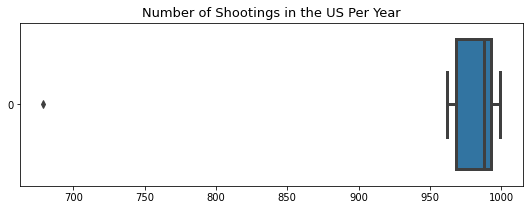

In [7]:
# Create a box plot
fig, ax = plt.subplots(figsize=(9,3))
sns.boxplot(ax=ax,data=shootings['year'].value_counts().sort_index(),orient='h',linewidth=3)
plt.title('Number of Shootings in the US Per Year',fontsize=13)

# Run descriptive stats
shoot_stats = pd.DataFrame(shootings['year'].value_counts().sort_index().describe())
display(shoot_stats)

From the information above we see that on average 935 people are fatally shot by the police each year in the US. Since the year 2020 is not yet complete this number has been skewed left. Looking at the boxplot, which has a median of 988, we can see that the majority of the distribuition lies between 950 and 1000 cases.

When considering the population of the US which is about 328.2 million (as of 2019), 900 - 1,0000 fatal shootings does not seem significant. In fact that accounts for about 0.00030% of the population. It is true that the likelyhood of being fatally shot by the police in general is very small. 

However, we can see that does not really say much about whether or not minorites are shot by police more often.
***


## Exploring Fatal Police Shootings By Race

Above we discovered that the average person has a small chance of being fatally shot by the police.

However, if there are groups of people fatally shot by the police more often than one group, say the majority, then it is evident that there is a bias causing injustice. As we mentioned one of the ways this can happen is through racial prejudice or bias. We want to explore how people of different races compared to those that are white are fatally shot by the police in the US. 


### Missing Data

In [8]:
# Count the number of missing values in the race column
shootings['race'].value_counts(dropna=False)


W    2533
B    1322
H     924
      613
A      93
N      78
O      47
Name: race, dtype: int64

We have missing values in the form of an empty string instead of nan values. There is no easy way to find the missing races for each person, so we will drop these observations from the dataset.

In [78]:
# Drop observations with missing race
shootings = shootings[shootings['race'] != ""]

In [10]:
# Check again for missing values
shootings['race'].value_counts()

W    2533
B    1322
H     924
A      93
N      78
O      47
Name: race, dtype: int64

### Create Race Columns

In [11]:
# Create list of race strings
races = ['W','B','N','A','O','H']

# Write function to add a column for each race
def race_sort(race):
    shootings[race] = shootings['race'].apply(lambda r:1 if r==race else 0)
    return

# Add col for each race the list to the df
for race in races:
    race_sort(race)

## Looking at the Number of Incidents Alone


### Distribution of shootings by race in the US

Here we chart the proportion of fatal police shootings by race in the US from 2015- Present.

W    0.506904
B    0.264559
H    0.184911
A    0.018611
N    0.015609
O    0.009406
Name: race, dtype: float64

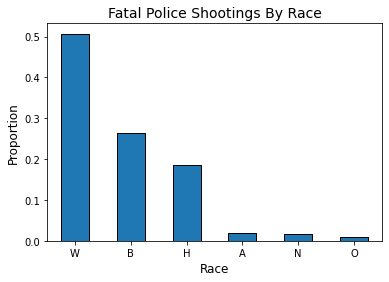

In [12]:
# Plot the proportions of shootings for each race
shootings['race'].value_counts(normalize=True).plot.bar(edgecolor='k',rot=0)
plt.title('Fatal Police Shootings By Race',fontsize=14)
plt.xlabel('Race',fontsize=12)
plt.ylabel('Proportion',fontsize=12)
shootings['race'].value_counts(normalize=True)

From the chart above we see that the majority of incidents involved white people (45%), followed by black (23%) and hispanic (16%).

There were literally more white people fatally shot by the police in the US from 2015-2020, however that does not mean that minorities are not killed by the police disproportionately. We need to account for the population demographics in each state in order to see whether this is true.

## Accounting for Population Data

The population for each racial minority differs between states, and is often significantly less than the white population. To determine whether or not minorities are shot and killed more by police, we need to adjust the proportions for each race to the respective populations.

### Cleaning the Data

To keep our code concise, we will read in each file as a dataframe and store each dataframe in a dictionary.

In [13]:
# Read each file as a df and store in a dictionary
pop_data = {}
for i in range(5,9):
    key = 'race_201{}'.format(i)
    file = pd.read_csv('race-population-2015-2018/race_201{}.csv'.format(i))
    pop_data[key] = file

In [14]:
# Display some rows of a df
pop_data['race_2015'].head(5)

,GEO_ID,NAME,B03002_001E,B03002_001M,B03002_002E,B03002_002M,B03002_003E,B03002_003M,B03002_004E,B03002_004M,...,B03002_017E,B03002_017M,B03002_018E,B03002_018M,B03002_019E,B03002_019M,B03002_020E,B03002_020M,B03002_021E,B03002_021M
0,id,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!Not Hispanic or Latino,Margin of Error!!Total!!Not Hispanic or Latino,Estimate!!Total!!Not Hispanic or Latino!!White...,Margin of Error!!Total!!Not Hispanic or Latino...,Estimate!!Total!!Not Hispanic or Latino!!Black...,Margin of Error!!Total!!Not Hispanic or Latino...,...,Estimate!!Total!!Hispanic or Latino!!Native Ha...,Margin of Error!!Total!!Hispanic or Latino!!Na...,Estimate!!Total!!Hispanic or Latino!!Some othe...,Margin of Error!!Total!!Hispanic or Latino!!So...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...,Estimate!!Total!!Hispanic or Latino!!Two or mo...,Margin of Error!!Total!!Hispanic or Latino!!Tw...
1,0400000US01,Alabama,4858979,*****,4666109,2261,3204076,917,1296681,5680,...,1882,2318,48515,5710,8110,1950,5195,1566,2915,1203
2,0400000US02,Alaska,738432,*****,686607,*****,452472,1051,24739,1714,...,421,535,10266,2609,6484,2003,2581,1372,3903,1408
3,0400000US04,Arizona,6828065,*****,4729654,*****,3802263,2149,282718,5805,...,1321,616,474680,21301,81741,6271,41490,4856,40251,4409
4,0400000US05,Arkansas,2978204,*****,2770461,2071,2174934,1792,466486,4815,...,88,155,61716,6080,6709,1911,4270,1489,2439,1104


#### Functions to Clean the Data Sets

In [15]:
def remove_cols(df):
    """Removes margin of error columns for a cencus df.
        Drops columns with 3 digits and an M in label
        
    """
    labels = df.columns[df.columns.str.contains(r'\d{3}M')]
    df = df.drop(labels=labels,axis=1)
    return df

def clean_header(df):
    """Replaces header with clean one. Removes punctuation and 
        extra words from first row. Uses first row as header.
    """
    row1 = df.iloc[0,:].str.replace('Estimate!!','').str.replace('!!',' ')
    row1[4:] = row1[4:].str.replace('Total Not Hispanic or Latino','').str.replace('alone','')
    df.columns = row1.str.strip()
    df = df.iloc[1:,:]
    return df

def to_float(df):
    """Converts columns to float type.
    """
    df.iloc[:,2:] = df.iloc[:,2:].astype(float)
    return df

def create_other_race_col(df):
    """Combines select races into an 'Other' column.
    """
    df['Other'] = df['Native Hawaiian and Other Pacific Islander'] + df['Some other race']
    return df

def abbreviate_cols(df):
    """Renames columns of df to match shootings df column headings.
    """
    pop_rename_cols = {'Geographic Area Name':'state',\
        'White':'W', 'Black or African American':'B',\
        'American Indian and Alaska Native':'N', 'Asian':'A',\
        'Other':'O','Total Hispanic or Latino':'H'}
    df = df.rename(columns=pop_rename_cols)
    return df

def abbreviate_states(df):
    """Abbreviates state names in state column."""
    # Dictionary for state abbreviations
    abbr_dict = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA',
       'Colorado':'CO', 'Connecticut':'CT', 'Delaware':'DE', 'District of Columbia':'DC',
       'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN',
       'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD',
       'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS',
       'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH',
       'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY', 'North Carolina':'NC',
       'North Dakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA',
       'Rhode Island':'RI', 'South Carolina':'SC', 'South Dakota':'SD', 'Tennessee':'TN',
       'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA',
       'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY','Puerto Rico':'PR','United States':'US'}
    df['state'] = df['state'].map(abbr_dict)
    return df

def sort_df_by_state(df):
    """Returns df sorted alphabetically by state abbreviation.
    """
    df = df.sort_values(by='state').reset_index().drop('index',axis=1)
    return df

def select_cols(df):
    """Selects columns of interest.
    """
    df = df[['Geographic Area Name',\
        'White', 'Black or African American',\
        'American Indian and Alaska Native', 'Asian',\
        'Other','Total Hispanic or Latino']]
    return df

def remove_non_state(df):
    """Removes Puerto Rico and United States from the df.
    """
    df=df.loc[df['state']!='PR']
    df = df.loc[df['state']!='US']
    return df

#### Cleaning the Datasets

In [16]:
# Apply the functions above to each data frame in the dictionary pop_data
for key in pop_data:
    df = pop_data[key]
    df = remove_cols(df)
    df = clean_header(df)
    df = to_float(df)
    df = create_other_race_col(df)
    df = select_cols(df)
    df = abbreviate_cols(df)
    df = abbreviate_states(df)
    df = sort_df_by_state(df)
    df = remove_non_state(df)
    pop_data[key] = df

### Taking the Average Population 

In order to have a good estimate of the population from 2015 to 2020 we will take the mean racial population from the census data above, which consists of the years 2015-2018. Using the mean will make it easier to estimate the ratio of whites to minorities that were shot and killed by the police.

In [17]:
def make_pop_mean(dictionary):
    """Creates dataframe with average population of each race per state.
    
        Args: 
            dictionary (dict): The dictionary containing cencus df's for each year
            
        Returns:
            pop_mean (dataframe): Df containing mean populations and state index.
    """
    pop_mean = pd.DataFrame()
    state_idx = dictionary[list(dictionary)[0]]['state']
    for race in races:
        temp_df = list()
        for key in dictionary:
            df = dictionary[key]
            temp_df.append(df[race])
        pop_mean['{}'.format(race)] = pd.DataFrame(temp_df).apply(np.mean)
    pop_mean.set_index(keys=state_idx,inplace=True)
    return pop_mean

In [18]:
# Use function above to make the population mean dataframe
pop_mean = make_pop_mean(pop_data)


In [19]:
# Create dataframe of number of killings by race per state over years 2015 - Present
race_killings = shootings.groupby('state').agg(sum)[races]

### Filtering the Data 
For some states there are few reported incidents of fatal police shootings. Too few observations will skew the proportions of white to minority police killings unrealisitcally.

For example, let's look at Rhode Island:

In [20]:
RI_shootings = race_killings.loc['RI']
RI_pop = pop_mean.loc['RI']
RI_inv_prop = RI_pop.W / RI_shootings.W
RI_ratios = (RI_shootings / RI_pop) * RI_inv_prop
display(RI_shootings)
display(RI_pop)
display(RI_ratios)

W    1
B    2
N    0
A    0
O    0
H    1
Name: RI, dtype: int64

W    765659.50
B     58693.50
N      3040.25
A     36118.00
O      8020.00
H    160281.00
Name: RI, dtype: float64

W     1.000000
B    26.090095
N     0.000000
A     0.000000
O     0.000000
H     4.776982
Name: RI, dtype: float64

We see that Rhode Island has only 4 cases and we know it is the least populated state in the US, which results in extreme ratios, e.g. 26 black people shot for every 1 white person in RI. 

There are not enough cases in RI to provide significant information. Therefore we will filter the datasets using a cutoff of 30 observations per state to provide significant results.

In [21]:
# Filter race killings to have only states with 30 or more cases
sig_bool = (shootings['state'].value_counts()>=30).sort_index()
race_killings_sig = race_killings[sig_bool]

# Filter the mean population data too
pop_mean_sig = pop_mean[sig_bool]

### Calculating the White : Minority Ratio

To compute this ratio we first note that there are unequal racial population sizes per state. We need to normalize the the data which we will do by simply computing the proportion of people from each race that are fatally shot by the police.

The ratios will be constructed by comparing the proportions mentioned above of white people shot to the proportions of minorities shot. It will look like this:

 __white_prop: minority_prop__

We want to reduce __white_prop: minority_prop__ so that white_prop = 1. This way we are calculating the number of cases for each race for 1 case involving a white person. To do this we will multiply both sides of the ratio by the inverse of white_prop, i.e. multiply by 1/white_prop. 

This gives us __1 white person : X minorities shot__. 

In [84]:
# function to calculate the W:M ratio 
def calc_ratio(shoot_df, pop_df):
    """Computes White:Minority ratio.
        
        Args:
            shoot_df (dataframe): Df containing number of cases by race per state
            pop_df (dataframe): Df containing mean racial population per state
            
        Returns:
            dataframe: Contains W:M ratios for each state
    """
    ratios = (shoot_df / pop_df)
    inv_prop = 1 / ratios.W
    for col in ratios.columns:
        ratios[col] = np.round(ratios[col] * inv_prop)
    ratios = ratios.replace([np.inf,np.nan],0)
    ratios = ratios.astype(int)
    return ratios
    

In [23]:
# Calculate the white to minority ratio for fatal police shootings W:M
ratios = calc_ratio(race_killings_sig,pop_mean_sig)

# Display first few rows of ratios dataframe
ratios.head(5)


,W,B,N,A,O,H
state,,,,,,
AK,1,3,2,1,0,0
AL,1,1,0,0,0,0
AR,1,3,0,1,0,0
AZ,1,2,2,0,0,1
CA,1,4,2,0,2,1


The table above contains the number of people for each race fatally shot by the police for every 1 white person shot.
For example, in Arkansas there are 3 black people fatally shot for 1 white person.

### Which Race Has the Highest Race:White Ratio?

Clearly, there are states in the US in which ceratin racial minorities are disproportionately shot and killed by the police. We want to know which race has the highest ratio i.e. is killed the most throughout the country. To do this we will compute the descriptive statistics and make a box plot for each set of ratios.

,W,B,N,A,O,H
count,39.0,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.0,3.641026,1.564103,0.512821,2.410256,0.974359
std,0.0,2.345064,2.521433,0.720811,6.983884,0.706629
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,0.000000,0.000000,0.000000,1.000000
50%,1.0,3.000000,0.000000,0.000000,0.000000,1.000000
75%,1.0,5.000000,2.000000,1.000000,2.000000,1.000000
max,1.0,12.000000,9.000000,3.000000,41.000000,3.000000


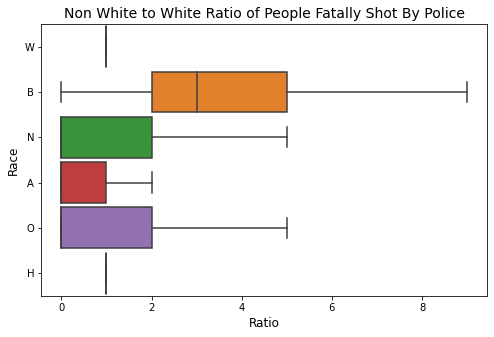

In [24]:
# Make box plots excluding outliers 
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(ax=ax,data=ratios,orient='h',width=0.9,showfliers=False)
plt.title('Non White to White Ratio of People Fatally Shot By Police',fontsize=14)
plt.xlabel('Ratio',fontsize=12)
plt.ylabel('Race',fontsize=12)

# Descriptive stats for the ratios
display(ratios.describe())

From the stats above we see that black people are fatally shot by the police more than any other race. The white:black ratio distribution is less skewed with most of the values falling between 2 and 5. 

Interstingly, for hispanics we see that on average the ratio is 1:1, which means that there is not much of a disproportion in fatal police shootings between hispanics and whites.

The ratios for the other races have a median of 0 and are heavily right skewed, which shows that for some states these races are fatally shot by police more than white people, but on average white people are killed more. This could be due to the fact that there is not a large population of these races in most states compared to the white and hispanic populations.



## Which States Are the Worst?

To answer this question we plotted side by side the 10 states with the greatest number of fatal police shootings for each race and the 10 states with the greatest ratios.

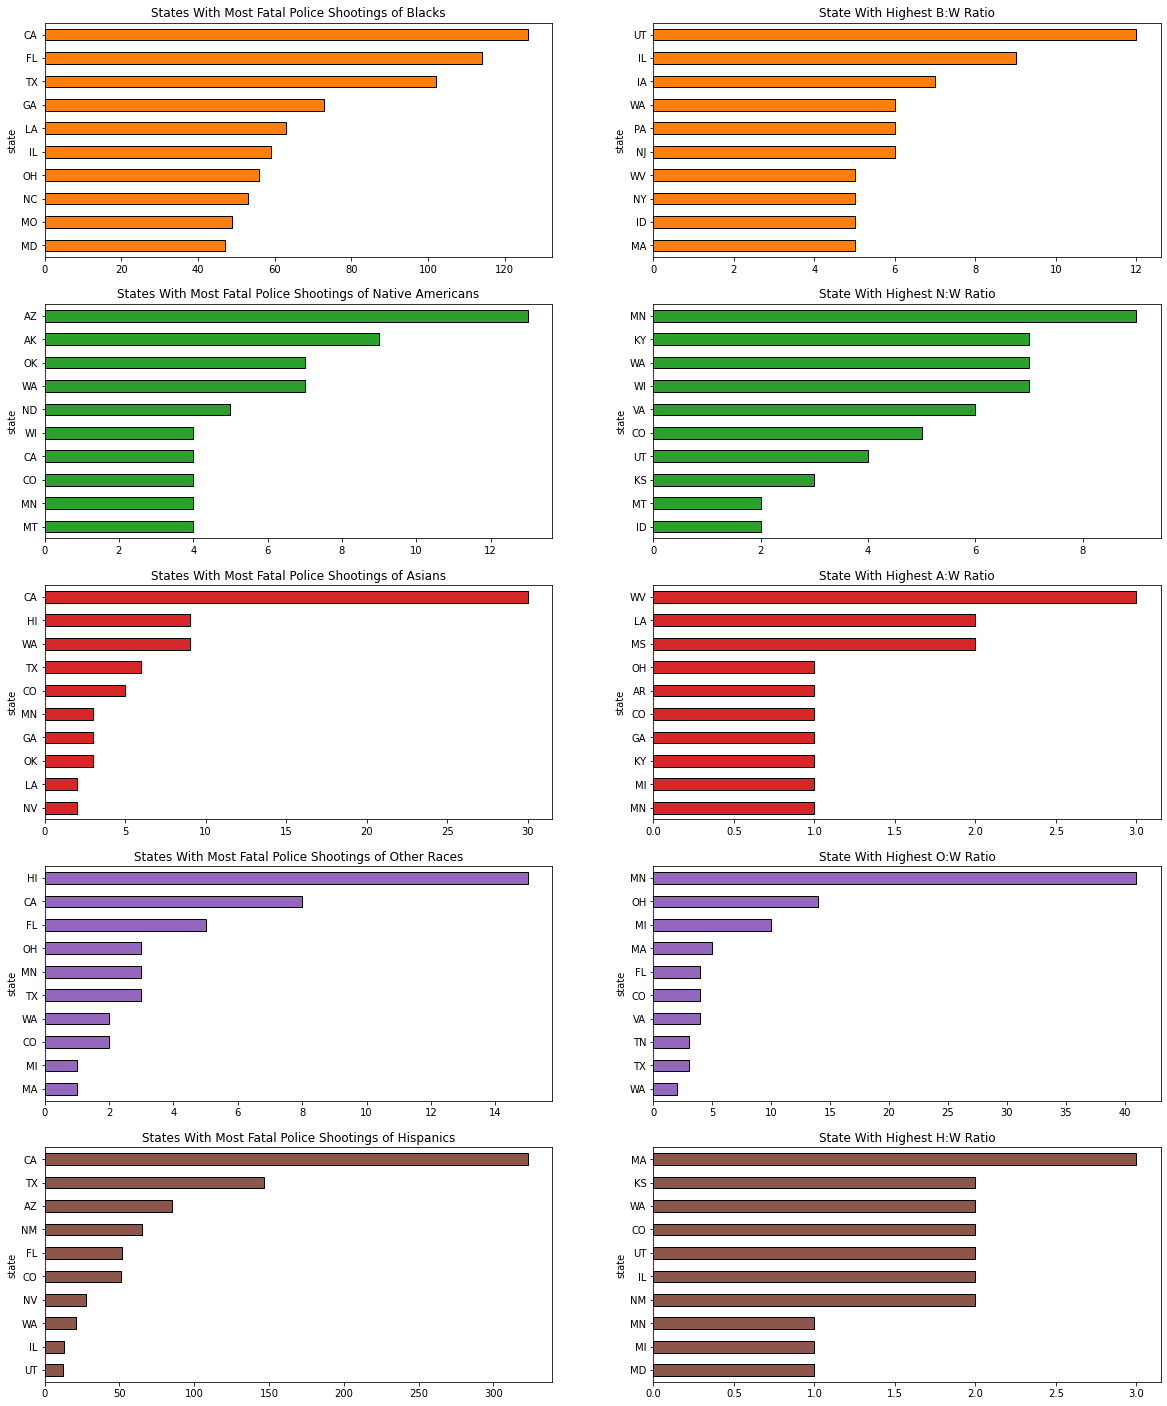

In [25]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2,figsize = (20,25))

colors = ['C{}'.format(i) for i in range(1,6)]
title_labels = ['Blacks','Native Americans','Asians','Other Races','Hispanics']

for i in range(0,5):
    for j in range(1):
        race_killings[races[i+1]].sort_values(ascending=True).tail(10).plot.barh(title=\
        'States With Most Fatal Police Shootings of {}'.format(title_labels[i]), color=colors[i],edgecolor='k',ax=axes[i,j]) 
    for k in range(1,2):
        ratios[races[i+1]].sort_values(ascending=True).tail(10).plot.barh(title=\
                'State With Highest {}:W Ratio'.format(races[i+1]),color=colors[i],edgecolor='k',ax=axes[i,k])


We see that California is among the top ten for all races when counting the number of shootings. However, CA is not in the ten states with the highest ratios for any race. This is probably due to the fact that California is the most populated state in the US and one of the most diverse. 

The number of cases alone only tells us part of the story, and in this case it shows us that states with higher populations, especially minority populations, will have higher incidences of fatal police encounters.  

Using adjusted proportions from the cencus data allows us to see where the problem is most prevalent. For example we see that the state of Utah has the highest B:W ratio 12:1. Additionally, Minnesota has the highest N:W ratio (9:1), West Virginia has the highest A:W ratio (3:1), and Massachusets has the highest H:W ratio (3:1). 

The purpose of this analysis is not to pick on any one state, but rather to show that the disproportion between fatal police shootings of minorites and those of white people is real and that there are areas in the country that are worse than others.

## Attacking vs Not Attacking Police

Part of the data collected by the Washington Post inclues a __threat_level__ column that indicates whether or not the person killed by police attacked them first. We want to explore how many of these people attacked police.

### How Many People Attacked Police Overall?

To answer this question we will first take a look at the data in the __threat_level__ column.

In [26]:
# Count the unique values in this column
shootings['threat_level'].value_counts(dropna=False)

attack          3225
other           1560
undetermined     212
Name: threat_level, dtype: int64

We see that the values in this column are 'attack', 'other', or 'undetermined'. Below we will categorize these values as either True, the person attacked, or False, the person did not attack. Those that fall under 'other' or 'undetermined' will labeled as False because it is not clear that they attakced police.

True     0.645387
False    0.354613
Name: attacked, dtype: float64

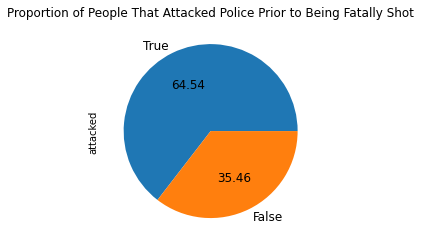

In [49]:
# Create dictionary to map values to booleans
attack_map = {'attack':True,'other':False,'undetermined':False}

# Apply the map to the threat level column and add to df as attacked column
shootings['attacked'] = shootings['threat_level'].map(attack_map)

# Plot the percentage distribution
shootings['attacked'].value_counts(normalize=True).plot.pie(autopct='%.2f',fontsize=12)
plt.title('Proportion of People That Attacked Police Prior to Being Fatally Shot',fontsize=12)
display(shootings.attacked.value_counts(normalize=True))


We see that about 65% of people fatally shot by the police from 2015-2020 were reported to have attacked the police before being fatally shot. 

### Attacks Based On Race


Now we want to see the proprotion of each race that attacked police.

,A,B,H,N,O,W
attacked,,,,,,
False,42,435,389,34,16,856
True,51,887,535,44,31,1677
All,93,1322,924,78,47,2533


,attack,no_attack
A,55.0,45.0
B,67.0,33.0
H,58.0,42.0
N,56.0,44.0
O,66.0,34.0
W,66.0,34.0


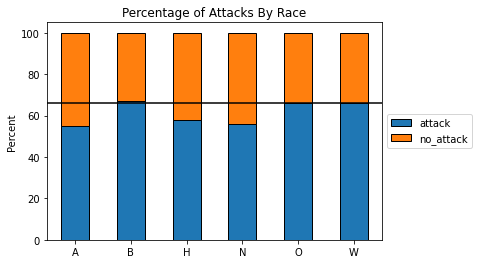

In [90]:
# Sort attacks by race
race_attacks = shootings.pivot_table(index='attacked',values=races,aggfunc=sum,margins=True)

# Compute the percentage and convert to dataframe
percent_attack = pd.DataFrame()
percent_attack['attack'] = round(race_attacks.iloc[1,:] / race_attacks.iloc[2,:]*100)

# Add percent of no attacks to df
percent_attack['no_attack'] = round(race_attacks.iloc[0,:] / race_attacks.iloc[2,:]*100)

#Plot the bar chart
percent_attack.plot.bar(stacked=True,rot=360,title='Percentage of Attacks By Race',edgecolor='k').set_ylabel('Percent')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.axhline(66,color='k')
display(race_attacks)
percent_attack

We see that for each race there were more attacks than not, which is consistent with the data above. Additionally, we added a line to represent the percentage of white people that attacked police. From this we see that no race had  significantly higher or lower rates of attack. In fact the difference in the proportions among races of people that attacked the police is not significantly great (less than 15% between any race).

The proportion of black people who attacked police is higher by only one percent than white people. This shows us that about the same proportion of white and black people fatally shot by the police attacked at some point in the encounter, yet as we learned, black people are killed disproportionally by the police. 

This shows that no racial minority is any more violent toward the police than white people. So why are they more likely to be shot? 

## Conclusion

